# List for research in deep learning
1. Activation function
2. Loss function
3. Follow Standford CS 229
     - This is crucial since we are trying to understand the fundementals of ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

In [2]:
# Part 1 Linear Regression
housing_data = np.loadtxt("/home/everitt257/Downloads/stanford_dl_ex-master/ex1/housing.data")
features = housing_data[:400, :-1]
ground_truths = housing_data[:400, -1].reshape(400,-1)
# Number of parameters to be trained
n = features.shape[1] # Number of columns
m = features.shape[0] # Number of rows

- **Fitting the line**
$$ \hat{y_i} = wx^i = w_0x_0^i + w_1x_1^i + ... + w_nx_n^i + b $$
The $\hat{y}$ should be as close to the original label $y$ as possible. Here I specify the loss function as:
$$loss = \frac{1}{2}\sum_{i=1}^{n}(\hat{y_i} - y_i)^2$$
What we are trying to do here is to minimize the loss function. To minmize the loss function. We'll use the 
gradient decent rule to help us decide what the partial derivatives are for each weight and bias.
**Please note that we can have other loss function defined as well. The reason I choose $loss = \frac{1}{2}\sum_{i=1}^{n}(\hat{y_i} - y_i)^2$ is because it penalizes error quadratically. Secondly it make the math easier when we take the partial derivative.**

    There are other reasons why least square are choosen. A nature assumption was to assume that given the weights or coefficients there exist some noise between the target label and and the linear equation. 
    $$y^i = wx^i + \epsilon$$
    where $\epsilon$ is a gaussian random variable with some variance $\sigma$ and mean zero. The probability density equation for the error is thus
    $$p(\epsilon^i) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{(\epsilon^i)^2}{2\sigma^2}}$$
    Given this, we can write the probability density equation $p(y^i|x^i,w)$ as
    $$p(y^i|x^i;w) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{(y^i-w^Tx^i)^2}{2\sigma^2}}$$
    We won't get into the details of the derivation, but I like to say it is related to maximizing the likelihood of weights, also we are assuming each feature is independently and identically distributed. 

- **Let's compute some derivatives**
    
    According gradient decent 
    
    $$\hat{w_i} = w_i - \alpha\frac{\partial loss}{\partial w}$$
    
    Where $w$ is the weight or bias. *To simplify things, we omits bias for the moment.*
    In our case of study, let's **work out the partial derivative for a single feature**:
    
    $$loss_{single} = \frac{1}{2}(\hat{y_i} - y_i)^2$$
    
    The derived derivative w.r.t to weight is thus just:
    $$
    \begin{split}
    \frac{\partial loss}{\partial w_i} & =  \frac{\partial loss}{\partial \hat{y_i}}
    \frac{\partial \hat{y_i}}{w_i} \\
    & = (\hat{y_i} - y_i)x_i
    \end{split}
    $$
    
    The derived derivative w.r.t to bias is
    
    $$
    \begin{split}
    \frac{\partial loss}{\partial b} & =  \frac{\partial loss}{\partial \hat{y_i}}
    \frac{\partial \hat{y_i}}{b} \\
    & = (\hat{y_i} - y_i)
    \end{split}
    $$
    
    So the update rule for the weight and bias of  single feature is just 
    
    \begin{align}
    \hat{w_i} & = w_i + \alpha(y_i-\hat{y_i})x_i \\
    \hat{b} & = b + \alpha(y_i-\hat{y_i})
    \end{align}
    
    For multiple features, the rule can be generalized as:
    
    \begin{align}
    \hat{w_i} & = w_i + \alpha\sum_{j=1}^{n}(y_i - \hat{y_i})x_i^j \\
    \hat{b} & = b + \alpha\sum_{j=1}^{n}(y_i-\hat{y_i})
    \end{align}
    
    Where $\hat{y_i} = wx^i$ and $\alpha$ equals the learning rate.
    
    **Note this is the gradient decent rule that follows the steepest decent. In practice we rarely consider this since it takes every derivative into account. Another solution is to use the so-called stochastic decent to accelerate the optimization**

- **Discussion of learning rate**
    
    As one may recall from the last paragraph. We have not discussed the $\alpha$ variable which is the learning rate. In fact this is crucial for us to decide what the learning rate is. If the not carefully choosen, the loss function may rise instead of decreasing in the next few iterations (not converging).
    
    There are three options for choosing the learning rate. You may find resouce to each of these method above at [here](https://sites.google.com/site/ece490spring2017/lecture-notes).         
    - fixed-stepsize
    - optimal-line search
    - back-tracking-line search

- **Discussion of data normalization**

    Since we're making prediction based on various type of data. It is essential to scale them to the same level in order to compare them. Another benefit is due to nature of gradient decent, it function will actually converge faster if our data is centered around zero.

In [238]:
def findMinMax(housing_data):
    """This function find the min and max of each column in the dataset"""
    min_max = []
    for col in range(housing_data.shape[1]):
        min_v = min(housing_data[:,col])
        max_v = max(housing_data[:,col])
        min_max.append((min_v,max_v))
    return min_max

def unNormalize(predictions, low, high):
    return predictions*(high-low) + low

def normalize(housing_data, min_max):
    """This function normalize housing data at range from 0 to 1"""
    normalized_data = np.zeros_like(housing_data)
    for index, pair in enumerate(min_max):
        normalized_data[:,index] = (housing_data[:,index] - pair[0])/(pair[1]-pair[0])
    return normalized_data

def partial_d(features, weights, bias, labels, loss_list):
    """Return partal derivative as matrix"""
    y_hat = np.dot(features, weights) + bias
    y_diff = y_hat - labels
    error = np.sum(y_diff**2)/2
    loss_list.append(error)
    weight_d = np.dot(features.transpose(),y_diff)
    bias_d = np.sum(y_diff)
    return weight_d, bias_d, loss_list

def update(old_w, old_b, weight_d, bias_d, a):
    """update weight and bias"""
    new_w = old_w - weight_d*a
    new_b = old_b - bias_d*a
    return new_w, new_b

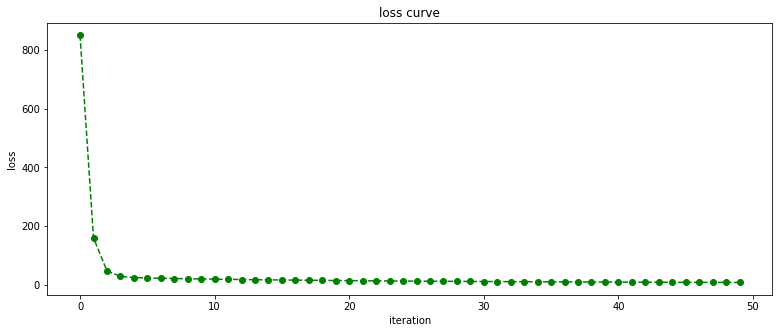

In [239]:
learn_rate = 0.001

min_max = findMinMax(housing_data)
normalized_data = normalize(housing_data, min_max)
nfeatures = normalized_data[:400, :-1]
nground_truths = normalized_data[:400, -1].reshape(400,-1)
# Initialize the weights and bias
weights = np.random.random_sample(n).reshape(n,-1)
bias = np.random.random_sample()
loss_list = []

for i in range(50):
    weight_d, bias_d, loss_list = partial_d(nfeatures, weights, bias, nground_truths, loss_list)
    weights, bias = update(weights, bias, weight_d, bias_d, learn_rate)
    
fig = plt.figure(figsize=(13, 5))
plt.plot(loss_list, linestyle="dashed", marker="o", color="green")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("loss curve")
plt.show()

- **Validate result**
    
    Now we take the calculated weights and bias and validate on test set

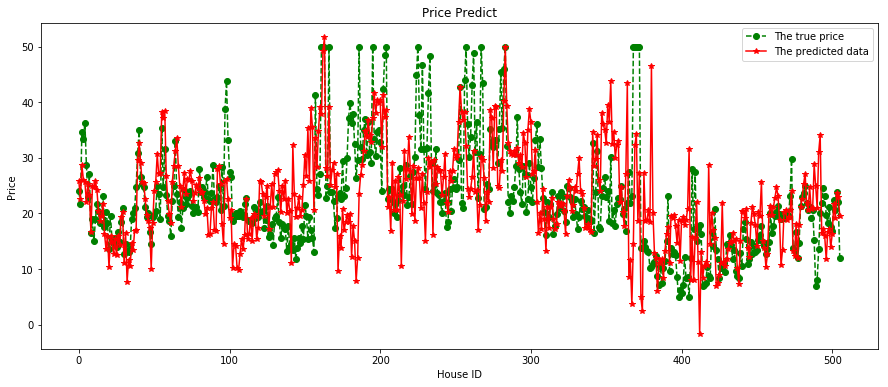

In [240]:
nfeatures = normalized_data[:, :-1]
predictions = np.dot(nfeatures, weights) + bias
true_predictions = unNormalize(predictions, min_max[-1][0], min_max[-1][1])
fig = plt.figure(figsize=(15,6))
plt.plot(housing_data[:,-1], linestyle="dashed", marker="o", color="green",label='The true price')
plt.plot(true_predictions, color="red", marker="*", label='The predicted data')
plt.xlabel("House ID")
plt.ylabel("Price")
plt.title("Price Predict")
plt.legend()
plt.show()

### **Decent with stochastic gradient decent**

> Whereas batch gradient descent has to scan through
the entire training set before taking a single step—a costly operation if m is
large—stochastic gradient descent can start making progress right away, and
continues to make progress with each example it looks at. Often, stochastic
gradient descent gets θ “close” to the minimum much faster than batch gradient
descent. (Note however that it may never “converge” to the minimum,
and the parameters θ will keep oscillating around the minimum of J(θ); but
in practice most of the values near the minimum will be reasonably good
approximations to the true minimum.2
) For these reasons, particularly when
the training set is large, stochastic gradient descent is often preferred over
batch gradient descent.
[Click here for reference](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

This is to say that using gradient decent can achieve almost the same effect as steepest descent given the function is convex. The difference between `SGD` and `Steepest Decent` is that `SGD` looks at each sample for error and update the coefficient.

Pseduo code for SGD:
```python
for sample in train_set:
    y_hat = sample*coeffs
    error = y_hat - y
    coeffs[0] = coeffs[0] - learn_rate*error
    for i in range(len(coeffs)-1)
        coeffs[i+1] = coeffs[i+1] - learn_rate*error*sample[i]
```

In [241]:
def SGD_coeffs(normalized_data, weights, bias, learn_rate):
    for sample in normalized_data:
        y_hat = sample[:-1].dot(weights) + bias
        error = y_hat - sample[-1]
        bias = bias - learn_rate*error
        for i in range(normalized_data.shape[1]-1):
            weights[i] = weights[i] - learn_rate*error*sample[i]
    return weights, bias

def sqError(normalized_data, weights, bias):
    y_hat = np.dot(normalized_data[:, :-1],weights) + bias
    y_diff = y_hat - normalized_data[:,-1]
    error = np.sum(y_diff**2)/2
    return error

In [242]:
nfeatures = normalized_data[:400, :-1]
nground_truths = normalized_data[:400, -1].reshape(400,-1)
# Initialize the weights and bias
weights = np.random.random_sample(n).reshape(n,-1)
bias = np.random.random_sample()

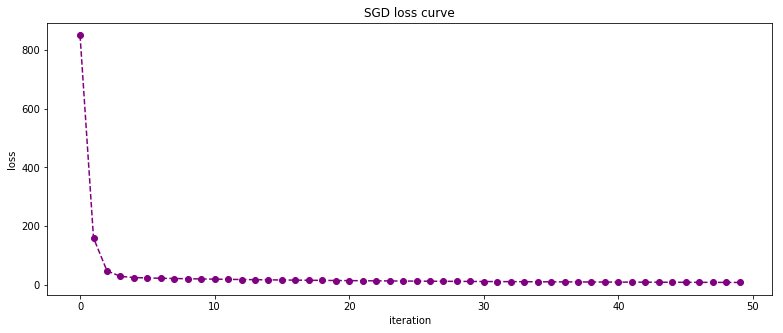

In [243]:
loss_list2 = []
for i in range(50):
    weights, bias = SGD_coeffs(normalized_data[:400], weights, bias, 0.001)
    error = sqError(normalized_data[:400], weights, bias)
    loss_list2.append(error)
    
fig = plt.figure(figsize=(13, 5))
plt.plot(loss_list, linestyle="dashed", marker="o", color="purple")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("SGD loss curve")
plt.show()

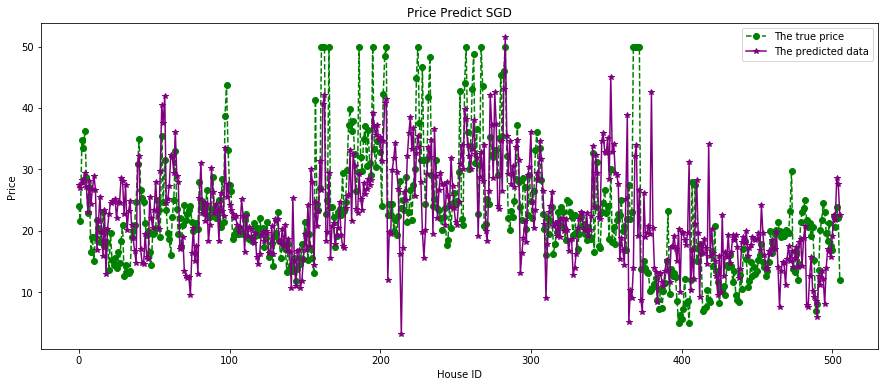

In [244]:
nfeatures = normalized_data[:, :-1]
predictions = np.dot(nfeatures, weights) + bias
true_predictions = unNormalize(predictions, min_max[-1][0], min_max[-1][1])
fig = plt.figure(figsize=(15,6))
plt.plot(housing_data[:,-1], linestyle="dashed", marker="o", color="green",label='The true price')
plt.plot(true_predictions, color="purple", marker="*", label='The predicted data')
plt.xlabel("House ID")
plt.ylabel("Price")
plt.title("Price Predict SGD")
plt.legend()
plt.show()

### Cross Validation
Cross validation allows us to split the data into `n` sets and train our parameters seperately. The key idea is to pick the optimal set of parameters in order to avoid overfitting. For this problem, we are skipping cross validation for now.

### Underfitting and Overfitting
The graph above is actually a behavior of underfitting. This might come from the fact that the data is not linear and comes with a lot of noise. To levitate underfitting, we can either introduce non-linearity into the model, for example, bringing in n-th degree polynomial in to the model such that the prediction model becomes:
$$\hat{y} = bias + w_0x_0 + w_1x_1^2 + w_2x_2^3 + ...$$
Of course n_th polynomial is very likely computational expensive, also n_th polynomial may overfitt the data and that's something we're trying to avoid since the model won't generalize. So we would need to choose our feature carefully. There's another algorithm regarding feature selection, but for the sake of simplicity let's not go into that for the moment.

Another alternative is to use a so-called **LWR(locally weighted linear regression) algorithm**. Unfortunately even though this algorithm might work well, it is also computational exhausitive since it is combination of linear regression model. This method is unparametric in the sense that its parameters are not fixed.

### Close Form Solution
We've seen how to find the coefficients iteratively, now let's see if we can find the solution directly via close form solution.

We now define our loss function as $J$, where the form of $J$ takes the following
$$J(w) = loss = \frac{1}{2}\sum_{i=1}^{n}(\hat{y_i(w)} - y_i)^2$$

We are trying to minimize $J$, since $J$ is a convex function over a convex set. There exist a globally unique solution for finding the minimum of $J$. What we are essentially finding are a set of coefficients that makes
$$\nabla_{w}{J(w)} = 0$$
Where $\nabla$ is the gradient symbol. 
The solution for such equation is that
$$
\begin{align}
\nabla_{w}{J(w)} &= X^TXW-X^T\vec{y} \\
W &= (X^TX)^{-1}X^T\vec{y}
\end{align}
$$
Given X is a full rank matrix with n < m(# features < # number of samples). We won't go into proof of why this is the case. Something we need to keep in mind is that not every function has a closeform solution.

### Dig undernearth
- Logistic Regression
- Classification
    - Softmax Regression (Multinomial Logistic Regression)
    - Perceptron Learning (Early model of neural network)
         - Force output value to be either 1 or 0
- Generalized Linear Models